In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import csv
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# retrieve data
csvpath = Path('Mean Income by State per Year.csv')
state_mean_income = pd.read_csv(csvpath) 
state_mean_income = state_mean_income.set_index('Year')
for state in state_mean_income.columns:
    state_mean_income[state] = state_mean_income[state].str.replace(',', '').astype(float)

income_change = state_mean_income.pct_change()

avg_income_change = income_change.apply(np.mean, axis = 0)
std_income_change = income_change.apply(np.std, axis = 0)

In [7]:
mc_dict = {}  # establish empty dictionary to hold monte_carlo result for each State 

mont_carlo_sims = 100 # number of monte_carlo simulations

steps = 10 # number of simulations to run

states = list(state_mean_income.columns) # create an iterable of states for for loop

last_rates = state_mean_income.loc[2018] # this gets the last data point for each state as a series

In [8]:
# loop through each state using enumerate which will return an index "i" and a the state label

for i, state in enumerate(states):

    # in each loop
    
    #A. create a dataframe to store all the monte carlos
    state_df = pd.DataFrame()
        
    for x in range(mont_carlo_sims):

        # 1. assign the value from last_rates that matches up with the state. These are the rates from 2018 for each state
        sim_values = [last_rates[i]]
        # 2. build up the time series for each state by appending one simulated value for each step
        # steps is defined above, we are just iterated through the count of steps
        
        # Monte Carlo simulation
        for _ in range(steps):

            # for each step:
            # 1. get the last value in the series that was appended
            last_value_in_series = sim_values[-1]

            # 2. generate a random number from a standard normal distribution and multiply by the std. deviations
            # this will produce a random number x-standard deviations away from the mean with a normal (Gaussian) distribution
            # add 1 to the random change since the mean of the random change is 0, but you want 0 -> 1.
            # We want the random change to center at 1 (not zero)
            random_change = 1.0 + np.random.normal(avg_income_change[i], std_income_change[i]) # disturbance

            #3. multiply the last_value_in_series by the random change to get next value in sim and append to time series of sims
            sim_values.append(last_value_in_series * (random_change))
        
            #B. concatenate sim_values to the dataframe
        state_df[x] = sim_values
    
    
    mc_dict[state] = state_df # your monte_carlo dataframe for the state


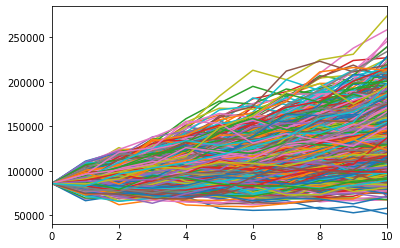

In [12]:
pd.DataFrame(mc_dict['D.C.']).plot(legend=None)

In [18]:
mc_dict.plot(groupby = 'State')

AttributeError: 'dict' object has no attribute 'plot'